In [228]:
import numpy as np
import pandas as pd
import time
from IPython.display import HTML
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt

In [229]:
# Reading file and changing column type to int for desired columns
df = pd.read_csv('large_df_Apr01202222:09:19.csv')
ocurrences_column_names = df.columns.values.tolist()[4:]
for column in ocurrences_column_names:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [230]:
# Dropping columns containing the number of victims
df = df[df.columns.drop(list(df.filter(regex='Nº DE VÍTIMAS')))]

In [231]:
# Dropping column duplicates
df = df.drop(['ESTUPRO DE VULNERÁVEL', 'ESTUPRO', 'ROUBO - OUTROS'], axis=1)
print(df)

                            DP                 Coordenadas   Ano  Mes  \
0                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Jan   
1                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Fev   
2                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Mar   
3                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Abr   
4                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Mai   
...                        ...                         ...   ...  ...   
24547  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Ago   
24548  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Set   
24549  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Out   
24550  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Nov   
24551  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Dez   

       HOMICÍDIO DOLOSO (2)  HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO  \
0                       1.0                      

In [232]:
# Save to csv
# t = time.localtime()
# current_time = time.strftime("%b%d%Y%H:%M:%S", t)
# df.to_csv(f'test_{current_time}.csv',encoding='utf-8', index=False, header=True)

In [233]:
# For "Crimes violentos" only drop columns
df0 = df[df.columns.drop(list(df.filter(regex='CULPOS')))]
df0 = df0[df0.columns.drop(list(df.filter(regex='FURTO')))]
print(df0)

                            DP                 Coordenadas   Ano  Mes  \
0                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Jan   
1                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Fev   
2                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Mar   
3                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Abr   
4                  001 DP - Sé  [-23.5569803, -46.6343707]  2022  Mai   
...                        ...                         ...   ...  ...   
24547  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Ago   
24548  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Set   
24549  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Out   
24550  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Nov   
24551  103 DP - Cohab Itaquera  [-23.5519944, -46.4370144]  2001  Dez   

       HOMICÍDIO DOLOSO (2)  HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO  \
0                       1.0                      

In [234]:
# Total crimes violentos column
df0['Total Crimes Violentos'] = df0.iloc[:, 4:].sum(axis=1)
# Grouping total crimes violentos by PD
df0 = df0.groupby(['DP', 'Coordenadas', 'Ano'])['Total Crimes Violentos'].sum().reset_index()

# Total delitos column
df['Total Delitos'] = df.iloc[:, 4:].sum(axis=1)
# Grouping total delitos by PD
df = df.groupby(['DP', 'Coordenadas', 'Ano'])['Total Delitos'].sum().reset_index()

# print(df)

### Total crime occurences year by year evolution in Sao Paulo

      Total Crimes Violentos
Ano                         
2001                194403.0
2002                196158.0
2003                207960.0
2004                204170.0
2005                202188.0
2006                188821.0
2007                181335.0
2008                173918.0
2009                195089.0
2010                181845.0
2011                189824.0
2012                201949.0
2013                218534.0
2014                251282.0
2015                230926.0
2016                237156.0
2017                224850.0
2018                199884.0
2019                199838.0
2020                173837.0
2021                176641.0
      Total Delitos
Ano                
2001     387658.000
2002     397069.000
2003     422864.000
2004     435379.000
2005     435707.006
2006     419856.188
2007     396766.017
2008     392183.721
2009     428037.479
2010     416267.393
2011     446064.666
2012     458919.999
2013     481832.273
2014     504136.239
2015     4659

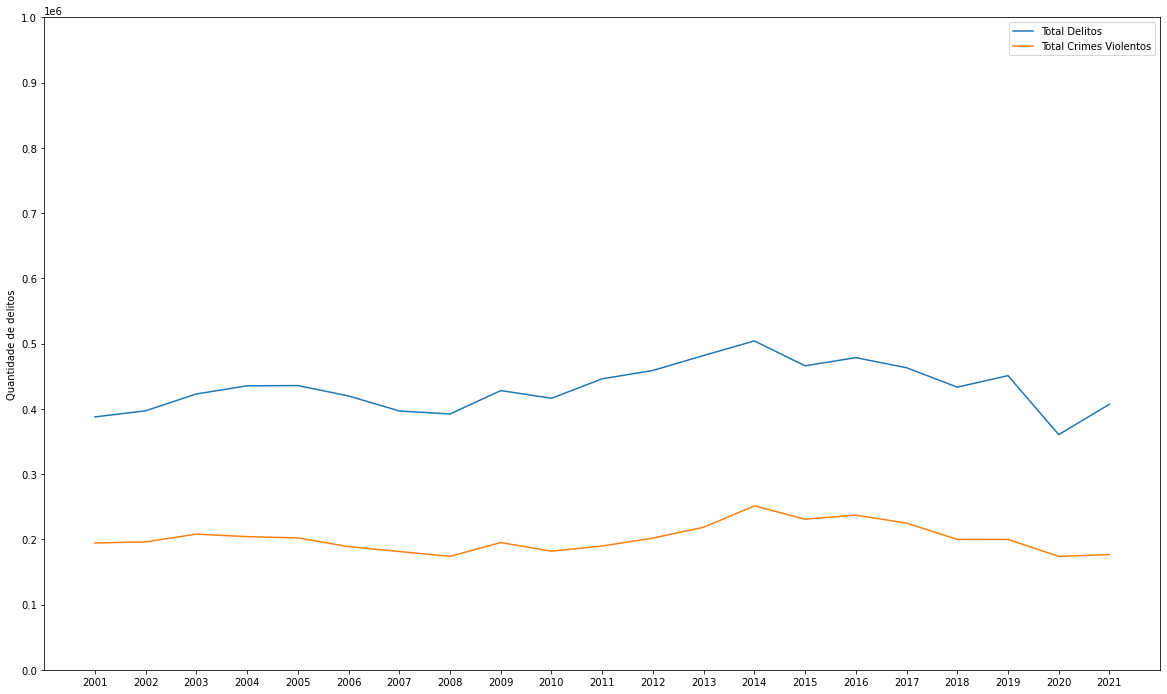

In [235]:
df0 = df0.groupby(['Ano'])['Total Crimes Violentos'].sum().reset_index()
df0 = df0[:-1]
df0 = df0.set_index('Ano')
print(df0)
yint = list(range(0, 1100000, 100000))

df1 = df.groupby(['Ano'])['Total Delitos'].sum().reset_index()
df1 = df1[:-1]
xint = df1['Ano'].to_list()
df1=df1.set_index('Ano')
print(df1)

df3 = df1.join(df0)
print(df3)

chart = df3.plot(figsize=(20,12), xticks=xint, yticks=yint, ylim=(0,1000000))
chart.set_ylabel('Quantidade de delitos')
chart.set_xlabel(None)
chart.set_facecolor('white')
plt.savefig('total_vs_violent_crimes.png')

### Total crime occurences police department distribution

In [236]:
df2 = df.groupby(['DP'])['Total Ocorrencias'].sum().reset_index()
df2['Rank'] = df2['Total Ocorrencias'].rank(ascending=False)
df2 = df2.sort_values(by=['Rank'])
# print(df2)
plt.figure(figsize=(20,12),facecolor='white')
plt.hist(df2['Total Ocorrencias'])
plt.show()

KeyError: 'Column not found: Total Ocorrencias'

In [ ]:
df = df.pivot_table(index='Ano', columns='DP', values='Total Ocorrencias')
df = df[:-1]
# print(df)

### Total crime occurences year by year evolution partitioned by PD

In [ ]:
df.plot(figsize=(20,12), xticks=xint, ylim=(0,20000)).legend(bbox_to_anchor=(1.0, 1.0))